# **Periksa kualitas dataset, termasuk nilai yang hilang, data duplikat, outlier, serta ketidakseimbangan data.**

Import Library

In [ ]:
import numpy as np
import pandas as pd
!pip install pandas_profiling
!pip install pydantic-settings
!pip install ydata-profiling
import ydata_profiling as pp
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=447c7b79f1812d6661162ee233b198a7bd3a785a794357fda6d41bc94c432a32
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Memanggil Tabel Data

In [ ]:
data = pd.read_csv('/content/heart.csv')

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Mengecek Missing Value

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Terdapat data duplicate karena banyak data yang menunjukkan data kategori sehingga terdapat banyak nilai yang sama. Karena ini termasuk data kesehatan, sehingga nama dan informasi pasien sudah dihapuskan untuk privasi sehingga bukan termasuk human error, sehingga duplicate tidak perlu dihapus.

Mengecek Outlier

Mengecek Imbalance

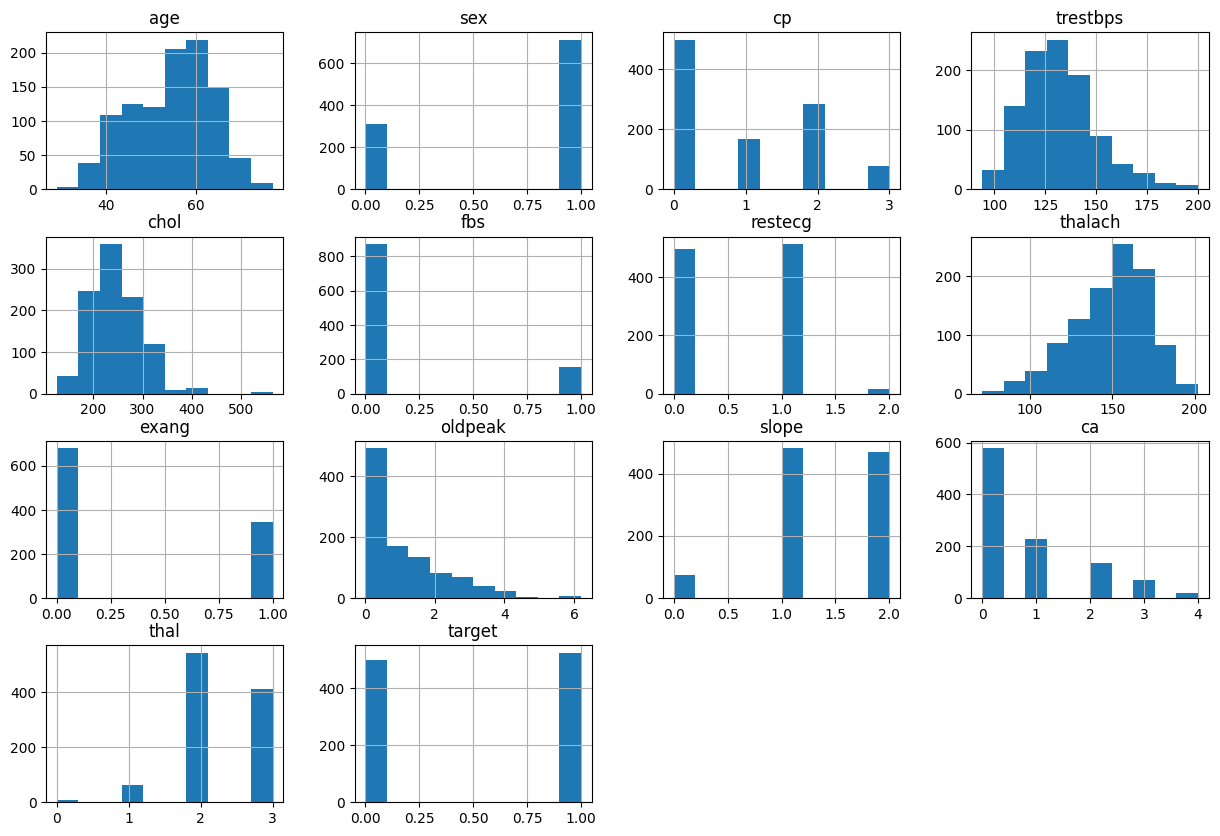

In [ ]:
data.hist(figsize=(15, 10), bins=10)
plt.show()

Dari data distrogram tersebut, dapat dilihat bahwa data yang mendekati balance yaitu data pada kolom target, sementara yang lain imbalance.

# **Periksa statistik deskriptif dari dataset, seperti rata-rata, distribusi, dan lainnya.**

Describing Dataset

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Pada describing dataset di atas dapat diketahui nilai rata-rata, standar deviasi, nilai minimal, quartil atas, nilai tengah(median), quartil bawah, dan nilai maksimum pada masing-masing kolom yang tersedia.

Membuat histrogram untuk data kolom numerik

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

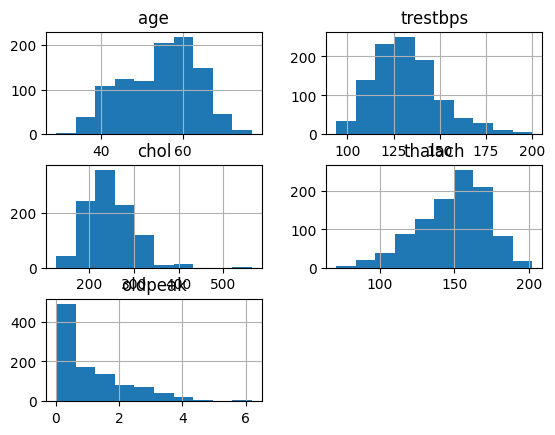

In [ ]:
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].hist()

In [ ]:
#Melihat Distribusi Data Numerik
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].skew()

,0
age,-0.248866
trestbps,0.739768
chol,1.074073
thalach,-0.513777
oldpeak,1.210899


Membuat histogram untuk kolom yang termasuk kategori

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'ca'}>, <Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

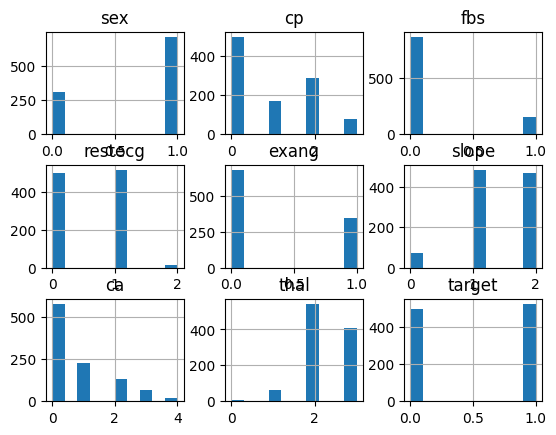

In [ ]:
data[['sex', 'cp', 'fbs', 'restecg', 'exang','slope','ca','thal','target']].hist()

# **Periksa korelasi antara fitur-fitur**

In [ ]:
corr_matrix = data.corr()
print(corr_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

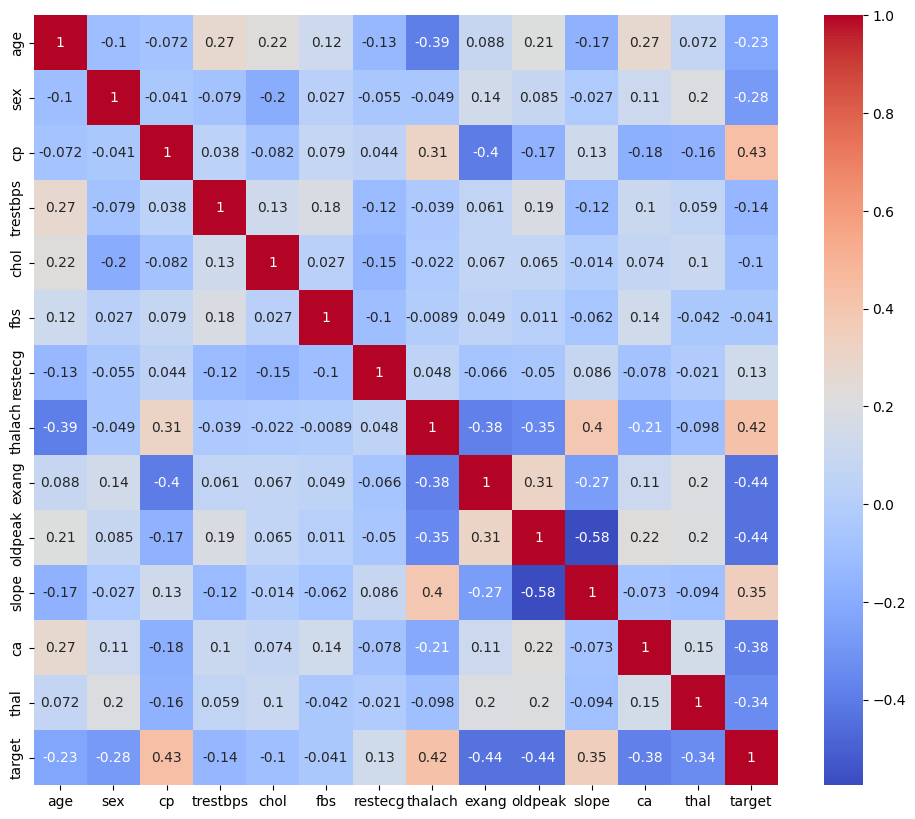

In [ ]:
corr = data.corr()
plt. figure(figsize=(12,10))
sns.heatmap(corr,annot = True, cmap='coolwarm')
plt.show()

# **Visualisasikan**

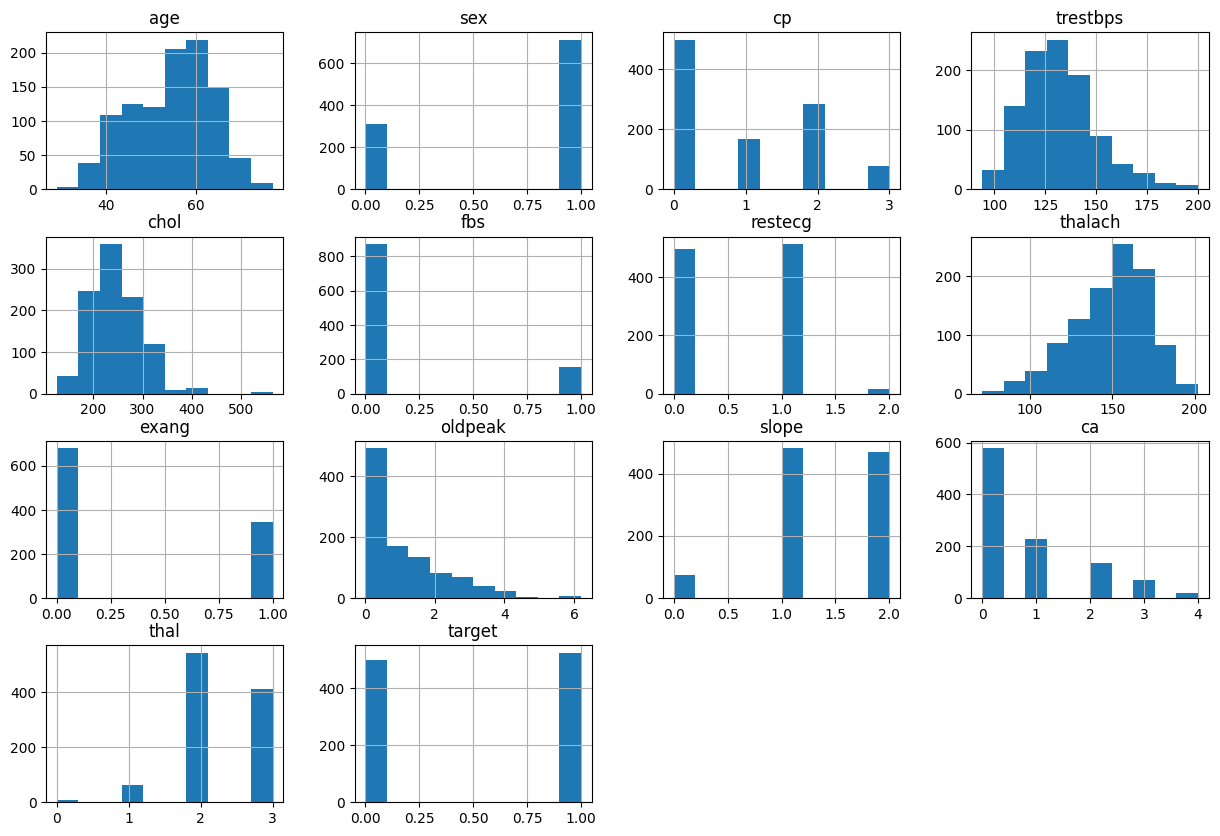

In [ ]:
data.hist(figsize=(15, 10), bins=10)
plt.show()

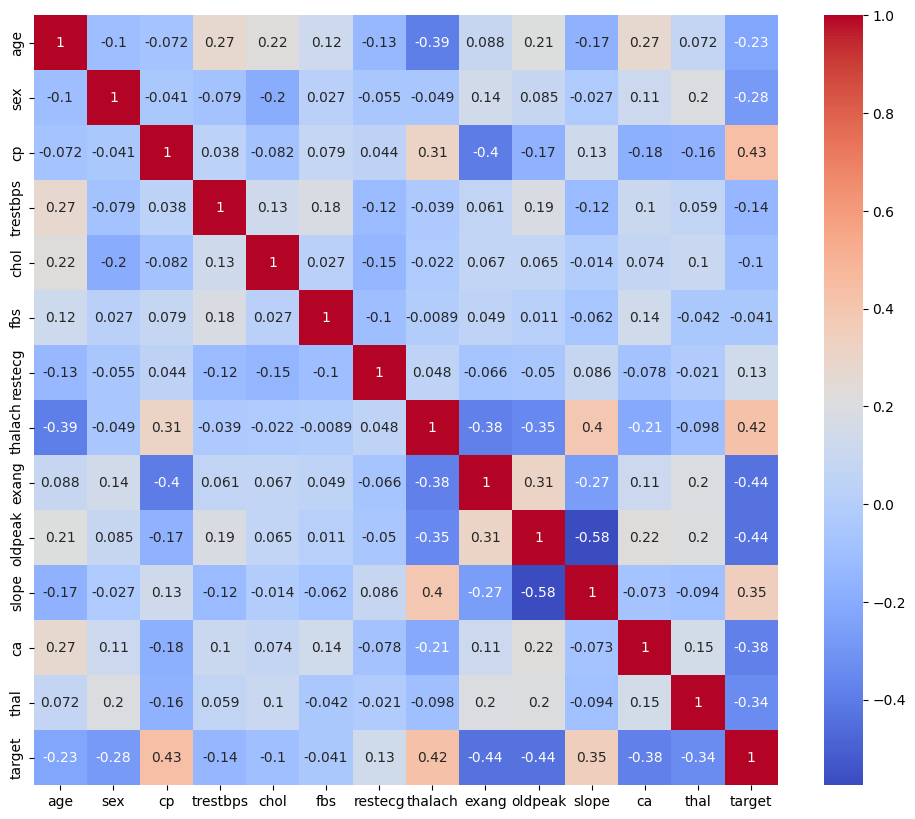

In [ ]:
corr = data.corr()
plt. figure(figsize=(12,10))
sns.heatmap(corr,annot = True, cmap='coolwarm')
plt.show()

In [ ]:
# load dataset
data = pd.read_csv('/content/heart.csv')

<Figure size 1800x1500 with 0 Axes>

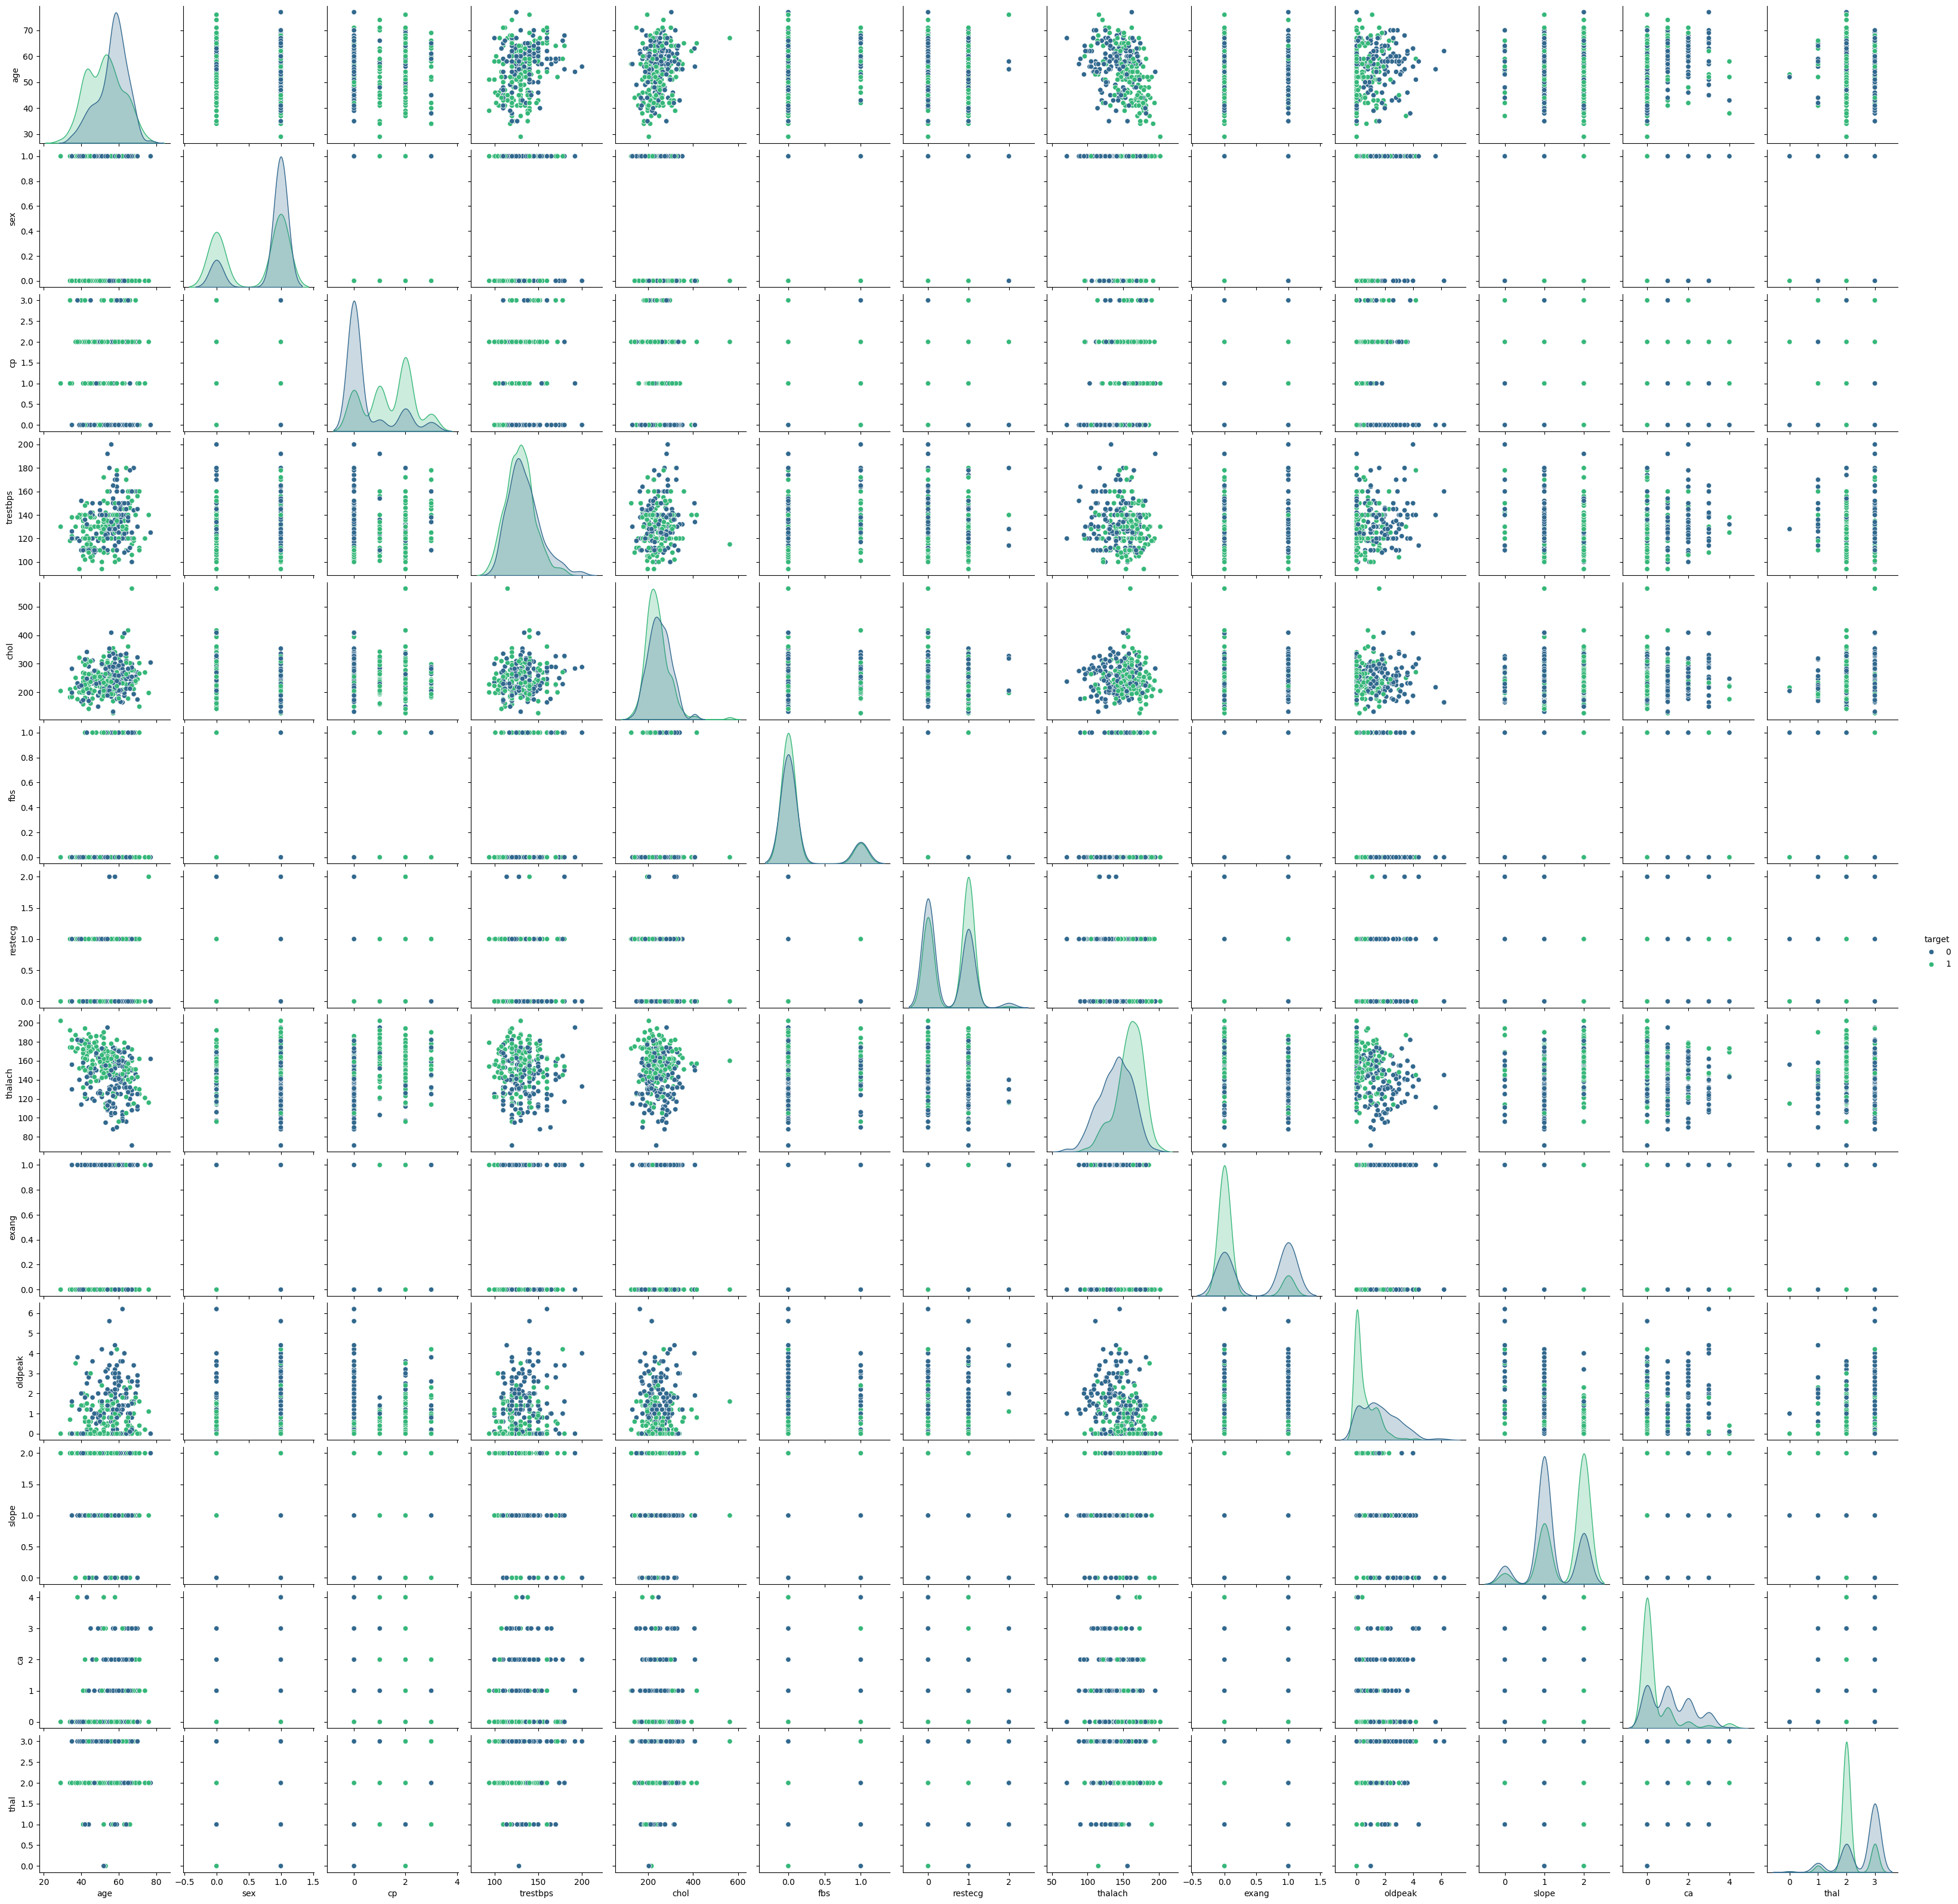

In [ ]:
plt.figure(figsize=(18,15))
sns.pairplot(data=data, hue='target', palette='viridis')
plt.show()

# **proses encoding**

In [ ]:
data['sex'].value_counts()

,count
sex,
1,713
0,312


In [ ]:
data['cp'].value_counts()

,count
cp,
0,497
2,284
1,167
3,77


In [ ]:
data['fbs'].value_counts()

,count
fbs,
0,872
1,153


In [ ]:
data['restecg'].value_counts()

,count
restecg,
1,513
0,497
2,15


In [ ]:
data['exang'].value_counts()

,count
exang,
0,680
1,345


In [ ]:
data['slope'].value_counts()

,count
slope,
1,482
2,469
0,74


In [ ]:
data['ca'].value_counts()

,count
ca,
0,578
1,226
2,134
3,69
4,18


In [ ]:
data['thal'].value_counts()

,count
thal,
2,544
3,410
1,64
0,7


In [ ]:
data['target'].value_counts()

,count
target,
1,526
0,499


Membuat Feature Baru

In [ ]:
# Membuat kolom baru untuk menghitung jumlah faktor risiko
data['total_risk_factor'] = 0

In [ ]:
# Menghitung jumlah faktor risiko
data.loc[data['trestbps'] > 140, 'total_risk_factor'] += 1
data.loc[data['chol'] > 240, 'total_risk_factor'] += 1
data.loc[data['fbs'] > 120, 'total_risk_factor'] += 1
data.loc[data['ca'] >= 1, 'total_risk_factor'] += 1
data.loc[data['thal'] == 3, 'total_risk_factor'] += 1

In [ ]:
# Melihat hasil
print(data[['trestbps', 'chol', 'fbs', 'ca', 'thal', 'total_risk_factor']])

      trestbps  chol  fbs  ca  thal  total_risk_factor
0          125   212    0   2     3                  2
1          140   203    1   0     3                  1
2          145   174    0   0     3                  2
3          148   203    0   1     3                  3
4          138   294    1   3     2                  2
...        ...   ...  ...  ..   ...                ...
1020       140   221    0   0     2                  0
1021       125   258    0   1     3                  3
1022       110   275    0   1     2                  2
1023       110   254    0   0     2                  1
1024       120   188    0   1     3                  2

[1025 rows x 6 columns]


# **Lakukan validasi silang dan bootstrapping**

Memisahkan Variabel Dependen dan Independen

In [ ]:
# Memisahkan variabel dependen dan independen
x = data.drop('target', axis=1)  # memilih semua kolom kecuali 'target'
y = data['target']  # memilih kolom 'target' sebagai variabel dependen

In [ ]:
# Menampilkan hasil pemisahan variabel
print('Variabel independen:')
print(x.head())

print('\nVariabel dependen:')
print(y.head())

Variabel independen:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  total_risk_factor  
0   2     3                  2  
1   0     3                  1  
2   0     3                  2  
3   1     3                  3  
4   3     2                  2  

Variabel dependen:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


Scalling Data pada x

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler

# melakukan scaling pada variabel x
scaler = MaxAbsScaler()
x_scaled = scaler.fit_transform(x)

# hasil scaling disimpan dalam objek dataframe
x_scaled_data = pd.DataFrame(x_scaled, columns=x.columns)

In [ ]:
#Melihat data x yang telah dilakukan scaling
x_scaled_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,total_risk_factor
0,0.675325,1.0,0.000000,0.625,0.375887,0.0,0.5,0.831683,0.0,0.161290,1.0,0.50,1.000000,0.50
1,0.688312,1.0,0.000000,0.700,0.359929,1.0,0.0,0.767327,1.0,0.500000,0.0,0.00,1.000000,0.25
2,0.909091,1.0,0.000000,0.725,0.308511,0.0,0.5,0.618812,1.0,0.419355,0.0,0.00,1.000000,0.50
3,0.792208,1.0,0.000000,0.740,0.359929,0.0,0.5,0.797030,0.0,0.000000,1.0,0.25,1.000000,0.75
4,0.805195,0.0,0.000000,0.690,0.521277,1.0,0.5,0.524752,0.0,0.306452,0.5,0.75,0.666667,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.766234,1.0,0.333333,0.700,0.391844,0.0,0.5,0.811881,1.0,0.000000,1.0,0.00,0.666667,0.00
1021,0.779221,1.0,0.000000,0.625,0.457447,0.0,0.0,0.698020,1.0,0.451613,0.5,0.25,1.000000,0.75
1022,0.610390,1.0,0.000000,0.550,0.487589,0.0,0.0,0.584158,1.0,0.161290,0.5,0.25,0.666667,0.50
1023,0.649351,0.0,0.000000,0.550,0.450355,0.0,0.0,0.787129,0.0,0.000000,1.0,0.00,0.666667,0.25


Splitting Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur (X) dan target (y)
x = data.drop('target', axis=1)
y = data['target']

# Preprocessing: Scaling data menggunakan StandardScaler
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)

# Membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Menampilkan informasi tentang jumlah data
print("Jumlah data pada x_train:", len(x_train))
print("Jumlah data pada x_test:", len(x_test))
print("Jumlah data pada y_train:", len(y_train))
print("Jumlah data pada y_test:", len(y_test))

Jumlah data pada x_train: 820
Jumlah data pada x_test: 205
Jumlah data pada y_train: 820
Jumlah data pada y_test: 205


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Membagi dataset menjadi data latih dan data uji
col = ['total_risk_factor', 'target']
x = data.drop(columns = col , axis=1)
y = data['target']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Melakukan scaling pada data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Menggunakan 5-fold cross-validation untuk evaluasi
model = DecisionTreeClassifier()

# Melatih model dengan data latih
model.fit(x_train_scaled, y_train)

scores = cross_val_score(model, x_train_scaled, y_train, cv=5)
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

# Predict the response for the test dataset
y_pred = model.predict(x_test)
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
# Display results
print("Akurasi model Decision Tree:", accuracy)

# Melakukan prediksi dengan data uji
y_pred = model.predict(x_test_scaled)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test data:', accuracy)

# Display additional evaluation metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy with cross-validation: 0.98 with standard deviation 0.02
Akurasi model Decision Tree: 0.32682926829268294
Accuracy on test data: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
age = 71
sex = 0  # 0 untuk wanita, 1 untuk pria
cp = 0  # Chest pain type
trestbps = 112 # Resting blood pressure
chol = 149  # Serum cholesterol
fbs = 0  # Fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
restecg = 1 # Resting electrocardiographic results
thalach = 125  # Maximum heart rate achieved
exang = 0  # Exercise induced angina
oldpeak = 1.6  # Oldpeak (depression induced by exercise)
slope = 1 # Slope of peak exercise ST segmentdw
ca = 0  # Number of major vessels colored by fluoroscopy
thal = 2  # Thalassemia (1 = fixed defect, 2 = normal, 3 = reversible defect)
# Buat array input untuk model
input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
predict = model.predict(input_data)

print(predict)

[1]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data into features (X) and target (y)
col = ['total_risk_factor', 'target']
x = data.drop(columns = col , axis=1)
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Melakukan scaling pada data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a Logistic Regression model
model3 = LogisticRegression(max_iter=1000)  # max_iter dapat diubah untuk memastikan konvergensi model

# Fit the model with training data
model3.fit(x_train, y_train)

scores = cross_val_score(model3, x_train_scaled, y_train, cv=5)
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

# Predict the response for the test dataset
y_pred3 = model3.predict(x_test)
# Calculate the accuracy score
accuracy3 = accuracy_score(y_test, y_pred3)
# Display results
print("Akurasi model Logistic Regression:", accuracy3)
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred3)
print('Accuracy on test data:', accuracy)
# Display additional evaluation metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred3))

Accuracy with cross-validation: 0.85 with standard deviation 0.03
Akurasi model Logistic Regression: 0.7951219512195122
Accuracy on test data: 0.7951219512195122

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [ ]:
age = 57
sex = 1  # 0 untuk wanita, 1 untuk pria
cp = 0  # Chest pain type
trestbps = 130 # Resting blood pressure
chol = 131  # Serum cholesterol
fbs = 0  # Fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
restecg = 1 # Resting electrocardiographic results
thalach = 115  # Maximum heart rate achieved
exang = 1  # Exercise induced angina
oldpeak = 1.2  # Oldpeak (depression induced by exercise)
slope = 1 # Slope of peak exercise ST segmentdw
ca = 1  # Number of major vessels colored by fluoroscopy
thal = 3  # Thalassemia (1 = fixed defect, 2 = normal, 3 = reversible defect)
# Buat array input untuk model
input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
predict = model3.predict(input_data)

print(predict)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Split data into features (X) and target (y)
x = data.drop('target', axis=1)
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Melakukan scaling pada data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a Random Forest Classifier model
model2 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Train the model
model2.fit(x_train, y_train)

scores = cross_val_score(model2, x_train_scaled, y_train, cv=5)
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

# Predict the response for the test dataset
y_pred2 = model2.predict(x_test)
# Calculate the accuracy score
accuracy2 = accuracy_score(y_test, y_pred2)
# Display results
print("Akurasi model Random Forest:", accuracy2)
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred2)
print('Accuracy on test data:', accuracy)
# Display additional evaluation metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred2))


Accuracy with cross-validation: 0.87 with standard deviation 0.03
Akurasi model Random Forest: 0.8
Accuracy on test data: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [ ]:
age = 71
sex = 0  # 0 untuk wanita, 1 untuk pria
cp = 0  # Chest pain type
trestbps = 112 # Resting blood pressure
chol = 149  # Serum cholesterol
fbs = 0  # Fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
restecg = 1 # Resting electrocardiographic results
thalach = 125  # Maximum heart rate achieved
exang = 0  # Exercise induced angina
oldpeak = 1.6  # Oldpeak (depression induced by exercise)
slope = 1 # Slope of peak exercise ST segmentdw
ca = 0  # Number of major vessels colored by fluoroscopy
thal = 2  # Thalassemia (1 = fixed defect, 2 = normal, 3 = reversible defect)
# Buat array input untuk model
input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
predict = model2.predict(input_data)

print(predict)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


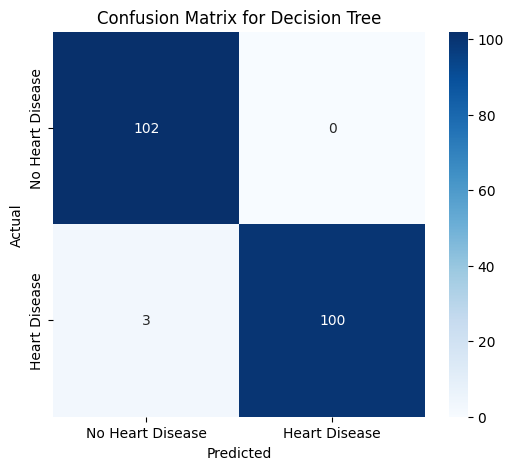

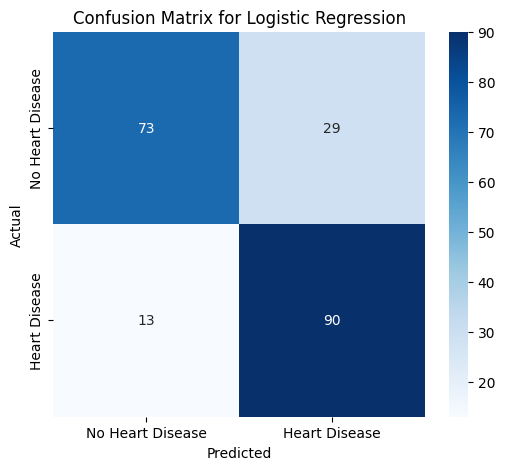

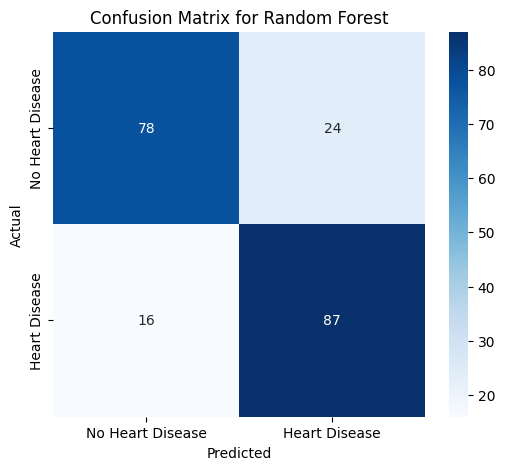

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# For Decision Tree model
plot_confusion_matrix(y_test, y_pred, 'Decision Tree')

# For Logistic Regression model
plot_confusion_matrix(y_test, y_pred3, 'Logistic Regression')

# For Random Forest model
plot_confusion_matrix(y_test, y_pred2, 'Random Forest')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle

# Memisahkan fitur (X) dan target (y)
col = ['total_risk_factor', 'target']
x = data.drop(columns=col, axis=1)
y = data['target']

# Membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Menyimpan scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Membuat model
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    print(f"=== {name} ===")
    # Latih model
    model.fit(x_train_scaled, y_train)

    # Simpan model
    with open(f"{name.replace(' ', '_').lower()}_model.pkl", "wb") as f:
        pickle.dump(model, f)

    # Evaluasi menggunakan cross-validation
    scores = cross_val_score(model, x_train_scaled, y_train, cv=5)
    print(f"Accuracy with cross-validation: {scores.mean():.2f} ± {scores.std():.2f}")

    # Prediksi pada data uji
    y_pred = model.predict(x_test_scaled)

    # Akurasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test data: {accuracy:.2f}")

    # Laporan klasifikasi
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print()


=== Decision Tree ===
Accuracy with cross-validation: 0.98 ± 0.02
Accuracy on test data: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


=== Random Forest ===
Accuracy with cross-validation: 0.87 ± 0.03
Accuracy on test data: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205


=== Logistic Regression ===
Accuracy with cross-validation: 0.85 ± 0.03
Accuracy on test data: 0.80

Class

In [ ]:
import pickle

# Menyimpan model Decision Tree
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Menyimpan model Random Forest
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model2, f)

# Menyimpan model Logistic Regression
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model3, f)


In [ ]:
import numpy as np
import pickle

# Load scaler dan model
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("decision_tree_model.pkl", "rb") as f:
    decision_tree_model = pickle.load(f)

with open("random_forest_model.pkl", "rb") as f:
    random_forest_model = pickle.load(f)

with open("logistic_regression_model.pkl", "rb") as f:
    logistic_regression_model = pickle.load(f)

# Data baru untuk prediksi
age = 71
sex = 0  # 0 untuk wanita, 1 untuk pria
cp = 0  # Chest pain type
trestbps = 112  # Resting blood pressure
chol = 149  # Serum cholesterol
fbs = 0  # Fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
restecg = 1  # Resting electrocardiographic results
thalach = 125  # Maximum heart rate achieved
exang = 0  # Exercise induced angina
oldpeak = 1.6  # Oldpeak (depression induced by exercise)
slope = 1  # Slope of peak exercise ST segment
ca = 0  # Number of major vessels colored by fluoroscopy
thal = 2  # Thalassemia (1 = fixed defect, 2 = normal, 3 = reversible defect)

# Buat array input
input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

# Terapkan scaling pada data baru
input_data_scaled = scaler.transform(input_data)

# Evaluasi dengan setiap model
decision_tree_prediction = decision_tree_model.predict(input_data_scaled)
random_forest_prediction = random_forest_model.predict(input_data_scaled)
logistic_regression_prediction = logistic_regression_model.predict(input_data_scaled)

# Tampilkan hasil prediksi
print(f"Decision Tree Prediction: {'Heart disease detected' if decision_tree_prediction[0] == 1 else 'No heart disease detected'}")
print(f"Random Forest Prediction: {'Heart disease detected' if random_forest_prediction[0] == 1 else 'No heart disease detected'}")
print(f"Logistic Regression Prediction: {'Heart disease detected' if logistic_regression_prediction[0] == 1 else 'No heart disease detected'}")


Decision Tree Prediction: Heart disease detected
Random Forest Prediction: Heart disease detected
Logistic Regression Prediction: Heart disease detected


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
